<a href="https://colab.research.google.com/github/merkington/fffff/blob/main/StopP.oq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Object of Search           Article for use in theft  Articles for use in criminal damage  Controlled drugs  Evidence of offences under the Act  Firearms  Offensive weapons  Stolen goods
officer_defined_ethnicity                                                                                                                                                                
Asian                                             0                                    0                22                                   0         0                  2             0
Black                                             0                                    0                18                                   0         2                  4             1
White                                             5                                    1                28                                   1         0                 15             5


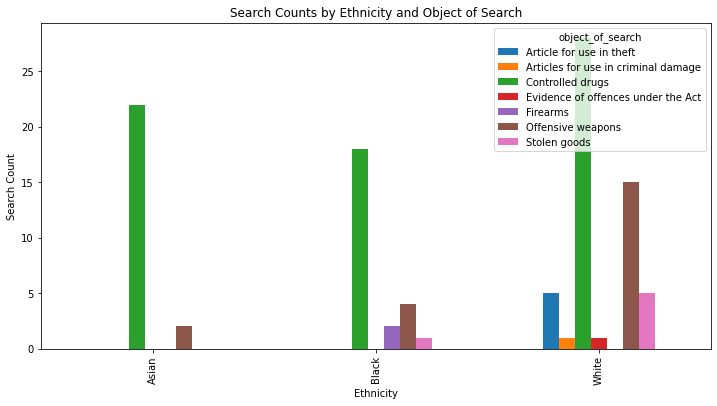

In [12]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Set the API parameters
parameters = {
    "lat": 52.629729,
    "lng": -1.131592
}

# Make a request to the API and get the JSON data
response = requests.get("https://data.police.uk/api/stops-street", params=parameters)
jdata = response.json()

# Convert the JSON data to a pandas DataFrame
df = pd.DataFrame(jdata)

# Group by ethnicity and object of search, and count the number of searches for each combination
grouped = df.groupby(['officer_defined_ethnicity', 'object_of_search'])['object_of_search'].count()

# Convert the grouped data to a pandas DataFrame and display it
df_table = grouped.unstack(fill_value=0)
df_table.columns.name = 'Object of Search'
print(df_table.to_string(index=True))

# Create a line plot of the search counts by ethnicity for each object of search
df_plot = grouped.unstack(fill_value=0)
df_plot.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Ethnicity')
plt.ylabel('Search Count')
plt.title('Search Counts by Ethnicity and Object of Search')
plt.show()
